<a href="https://colab.research.google.com/github/hquoctuan/Introduction_DL/blob/main/IrisDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Data Set

In [ ]:
#cài đặt thư viện
!pip install -q lightning

In [ ]:
#download dataset
#!wget https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv
!gdown 1aXs9anuFLEOO2iQ9mUYDOkni04v_Fy9J

Downloading...
From: https://drive.google.com/uc?id=1aXs9anuFLEOO2iQ9mUYDOkni04v_Fy9J
To: /content/iris.csv
100% 3.98k/3.98k [00:00<00:00, 15.2MB/s]


In [ ]:
import lightning as L
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from torchmetrics import Accuracy
from sklearn.preprocessing import StandardScaler

In [ ]:
#read dataset
data = pd.read_csv("/content/iris.csv")
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Iris là dataset nhận dạng loại hoa từ 4 features bao gồm sepal.length, sepal.widt, petal.length, và petal.width

In [ ]:
#encode cho label
labels = {}
for index, element in enumerate(data["variety"].unique()):
  labels[element] = index

data.loc[:, "labels"] = data["variety"].apply(lambda x: labels[x])
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,labels
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


In [ ]:
data.describe()

,sepal.length,sepal.width,petal.length,petal.width,labels
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
 5   labels        150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Visualize

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


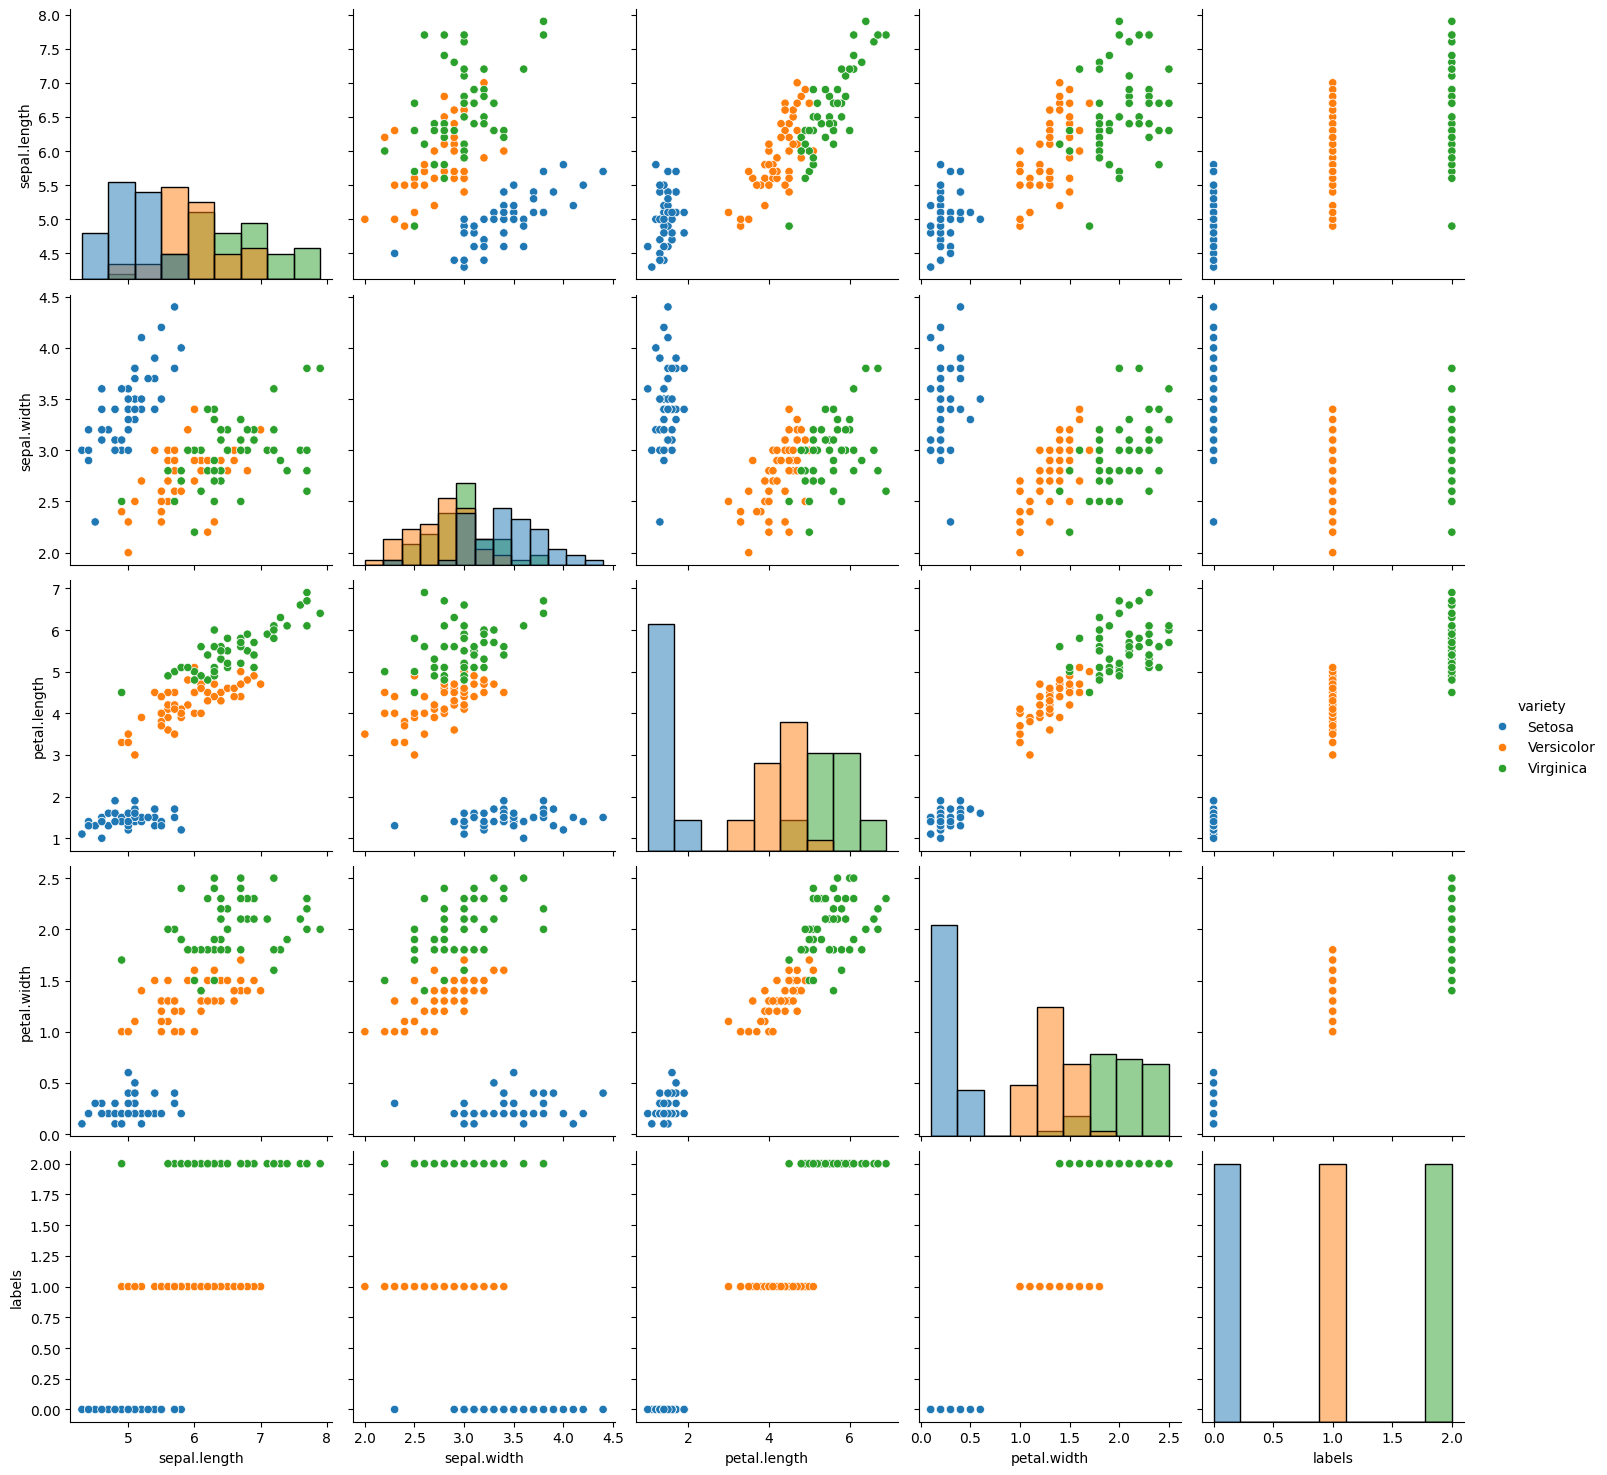

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(data, hue="variety", size=3,diag_kind="hist")

* Pental length và pental with là đặc trưng quan trọng để phân biệt các loài hoa

<ipython-input-90-5f83f5cb9d9a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='sepal.length', y='variety', inner='stick', palette='Dark2');
<ipython-input-90-5f83f5cb9d9a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='sepal.width', y='variety', inner='stick', palette='Dark2');
<ipython-input-90-5f83f5cb9d9a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='petal.length', y='variety', inner='stick', palette='Dark2');
<ipython-input-90-5f83f5cb9d9a>:23: FutureWarning: 

Passing `palette

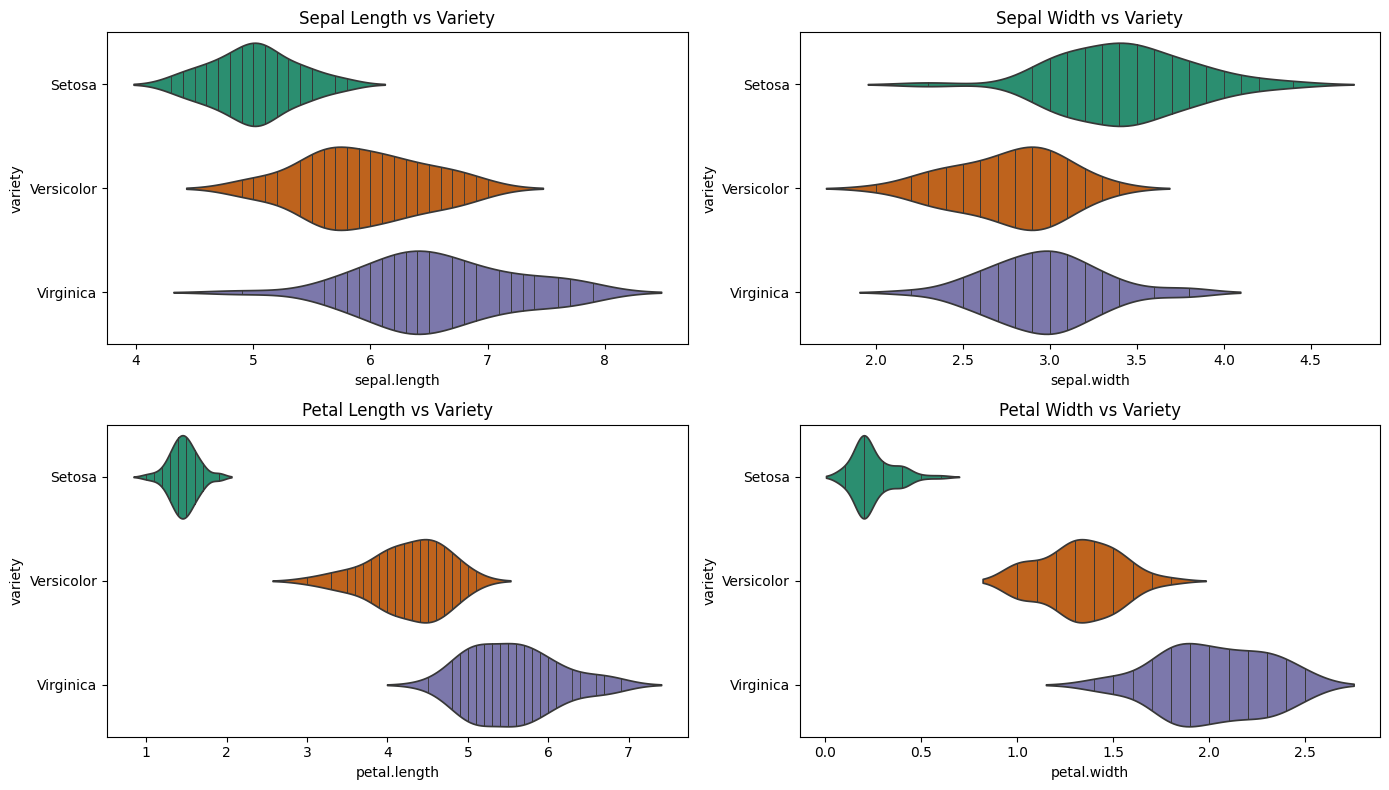

In [ ]:

figsize = (14,8)
plt.figure(figsize=figsize)

#sepal.length
plt.subplot(2, 2, 1)
sns.violinplot(data=data, x='sepal.length', y='variety', inner='stick', palette='Dark2');
plt.title('Sepal Length vs Variety');

# sepal.width
plt.subplot(2, 2, 2)
sns.violinplot(data=data, x='sepal.width', y='variety', inner='stick', palette='Dark2');
plt.title('Sepal Width vs Variety');

# petal.length
plt.subplot(2, 2, 3)
sns.violinplot(data=data, x='petal.length', y='variety', inner='stick', palette='Dark2');
plt.title('Petal Length vs Variety')

#petal.width
plt.subplot(2, 2, 4)
sns.violinplot(data=data, x='petal.width', y='variety', inner='stick', palette='Dark2');
plt.title('Petal Width vs Variety');

plt.tight_layout()
plt.show()




*   Hai đặc trưng **petal length** và **petal width** là hai yếu tố phân biệt rõ ràng nhất giữa ba loài hoa Iris.
*   **Sepal length** cũng có sự khác biệt đáng kể giữa Setosa và hai loài còn lại, nhưng sự chồng chéo giữa Versicolor và Virginica vẫn còn.
*  **Sepal width** có sự chồng chéo nhiều hơn giữa Versicolor và Virginica, trong khi Setosa có đặc điểm khác biệt rõ rệt






## Train_val_test split

In [ ]:
# Tạo class Dataset để đọc dữ liệu
COLUMNS = data.drop(['variety', "labels"], axis=1).columns.to_list()  # Lấy danh sách các cột không bao gồm 'variety' và 'labels'

class DataSet(torch.utils.data.Dataset):
    def __init__(self, data, normalizer, columns=COLUMNS):
        super(DataSet, self).__init__()  # Khởi tạo lớp cha
        self.data = data  # Lưu trữ dữ liệu đầu vào
        self.feature = normalizer.transform(self.data[columns].values)  # Chuẩn hóa các đặc trưng
        self.feature = torch.tensor(self.feature).float()  # Chuyển đổi các đặc trưng thành tensor kiểu float
        self.label = torch.tensor(self.data["labels"].values)  # Chuyển đổi nhãn thành tensor

    def __len__(self):
        return len(self.feature)  # Trả về số lượng mẫu trong dataset

    def __getitem__(self, idx):
        # Trả về một từ điển chứa đặc trưng và nhãn tại chỉ số idx
        return {"feature": self.feature[idx],
                "label": self.label[idx]}


In [ ]:
# Chia và chuẩn hóa dataset

BATCH_SIZE = 128  # Kích thước batch cho DataLoader

train_data, temp_data = train_test_split(data, test_size=0.4, random_state=0)  # 60% train, 40% còn lại
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=0)  # 20% val, 20% test

# Khởi tạo StandardScaler để chuẩn hóa dữ liệu
normalizer = StandardScaler()
# Tính toán các tham số chuẩn hóa dựa trên tập huấn luyện
normalizer.fit(train_data[COLUMNS].values)

# Tạo DataLoader cho tập huấn luyện, cho phép trộn và sử dụng nhiều workers
train_loader = torch.utils.data.DataLoader(DataSet(train_data, normalizer), batch_size=BATCH_SIZE,
                                           shuffle=True, num_workers=2)

# Tạo DataLoader cho tập val
val_loader = torch.utils.data.DataLoader(DataSet(val_data, normalizer), batch_size=BATCH_SIZE, num_workers=2)

# Tạo DataLoader cho tập kiểm tra
test_loader = torch.utils.data.DataLoader(DataSet(test_data, normalizer), batch_size=BATCH_SIZE, num_workers=2)

# Lấy một batch dữ liệu từ train_loader
data_loader = next(iter(train_loader))
# In ra kích thước của các đặc trưng trong batch
print(len(data_loader["feature"]))
# In ra kích thước của các nhãn trong batch
print(len(data_loader["label"]))
# In ra các đặc trưng và nhãn (bình luận lại để không in ra)
#print(data_loader["feature"], "\n", data_loader["label"])


90
90


## Training Model

* Với learning_rate =5e-3,epochs=100,batch_size =128



In [ ]:
# Tạo model
class Model(L.LightningModule):
    def __init__(self, num_classes=len(labels), learning_rate=5e-3, input_dim=len(COLUMNS)):
        super(Model, self).__init__()  # Khởi tạo lớp cha
        self.learning_rate = learning_rate  # Lưu trữ learning rate
        # Tạo mô hình MLP với các lớp tuyến tính và hàm kích hoạt ReLU
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(input_dim, 64),  # Lớp đầu vào với kích thước input_dim và đầu ra 64
            torch.nn.ReLU(),                  # Hàm kích hoạt ReLU
            torch.nn.Linear(64, 32),          # Lớp tiếp theo với đầu vào 64 và đầu ra 32
            torch.nn.ReLU(),                  # Hàm kích hoạt ReLU
            torch.nn.Linear(32, num_classes), # Lớp đầu ra với đầu vào 32 và đầu ra số lớp
        )

    def forward(self, x):
        return self.mlp(x)  # Thực hiện phép biến đổi thông qua mô hình MLP

    def training_step(self, batch, batch_idx):
        x = batch["feature"]  # Lấy đặc trưng từ batch
        y = batch["label"]    # Lấy nhãn từ batch
        y_pred = self(x)      # Dự đoán nhãn bằng mô hình
        # Tính toán loss bằng hàm CrossEntropy
        loss = torch.nn.CrossEntropyLoss()(y_pred, y)
        self.log('train_loss', loss, prog_bar=True)  # Ghi lại loss huấn luyện để hiển thị

        # Tính độ chính xác
        acc = (y_pred.argmax(dim=1) == y).float().mean()  # Tính accuracy
        self.log('train_acc', acc, prog_bar=True)  # Ghi lại độ chính xác huấn luyện

        return loss # Trả về loss

    def validation_step(self, batch, batch_idx):
        x = batch["feature"]  # Lấy đặc trưng từ batch
        y = batch["label"]    # Lấy nhãn từ batch
        y_pred = self(x)      # Dự đoán nhãn bằng mô hình
        # Tính toán loss cho tập val
        val_loss = torch.nn.CrossEntropyLoss()(y_pred, y)
        self.log('val_loss', val_loss, prog_bar=True)  # Ghi lại loss val để hiển thị
        # Tính độ chính xác
        val_acc = (y_pred.argmax(dim=1) == y).float().mean()  # Tính accuracy
        self.log('val_acc', val_acc, prog_bar=True)  # Ghi lại độ chính xác huấn luyện

        return val_loss # Trả về loss val

    def test_step(self, batch, batch_idx):
        x = batch["feature"]  # Lấy đặc trưng từ batch
        y = batch["label"]    # Lấy nhãn từ batch
        y_pred = self(x)      # Dự đoán nhãn bằng mô hình
        # Tính toán loss cho tập test
        test_loss = torch.nn.CrossEntropyLoss()(y_pred, y)
        self.log('test_loss', test_loss, prog_bar=True)  # Ghi lại loss test để hiển thị
        # Tính độ chính xác
        test_acc = (y_pred.argmax(dim=1) == y).float().mean()  # Tính accuracy
        self.log('test_acc', test_acc, prog_bar=True)  # Ghi lại độ chính xác test

        return test_loss # Trả về loss test



    def configure_optimizers(self):
        # Khởi tạo optimizer Adam với learning rate đã định
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer  # Trả về optimizer


In [ ]:
# Train model
model = Model()  # Khởi tạo một thể hiện của mô hình

# Tạo Trainer từ PyTorch Lightning với số epoch tối đa là 100 và kích hoạt tính năng phát hiện bất thường
trainer = L.Trainer(max_epochs=100, detect_anomaly=True)

# Bắt đầu quá trình huấn luyện mô hình với dữ liệu huấn luyện và val
trainer.fit(model, train_loader, val_loader)



INFO: You have turned on `Trainer(detect_anomaly=True)`. This will significantly slow down compute speed and is recommended only for model debugging.
INFO:lightning.pytorch.utilities.rank_zero:You have turned on `Trainer(detect_anomaly=True)`. This will significantly slow down compute speed and is recommended only for model debugging.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name | Type       | Params | Mode 
--------------------------------------------
0 | mlp  | Sequential | 2.5 K  | train
-----------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


In [ ]:
trainer.validate(model, val_loader)
trainer.test(model, test_loader)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.9000000357627869     │
│         val_loss          │    0.24605363607406616    │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9666666388511658     │
│         test_loss         │    0.06936933845281601    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.06936933845281601, 'test_acc': 0.9666666388511658}]

#Bài tập

Hãy thêm def test_step vào class Model, tiến hành huấn luyện model với batch size là 256, lr là 5e-4, epochs là 50.

Form: https://forms.gle/FHVtVDXnjYBSBGEC6


###  Với learning_rate =5e-4,epochs=50,batch_size =256


Chia và chuẩn hóa dataset

In [ ]:

BATCH_SIZE = 256  # Kích thước batch cho DataLoader
train_data, temp_data = train_test_split(data, test_size=0.4, random_state=0,shuffle=True)  # 60% train, 40% còn lại
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=0)  # 20% val, 20% test

# Khởi tạo StandardScaler để chuẩn hóa dữ liệu
normalizer = StandardScaler()
# Tính toán các tham số chuẩn hóa dựa trên tập huấn luyện
normalizer.fit(train_data[COLUMNS].values)

# Tạo DataLoader cho tập huấn luyện, cho phép trộn và sử dụng nhiều workers
train_loader = torch.utils.data.DataLoader(DataSet(train_data, normalizer), batch_size=BATCH_SIZE,
                                           shuffle=True, num_workers=2)

# Tạo DataLoader cho tập val
val_loader = torch.utils.data.DataLoader(DataSet(val_data, normalizer), batch_size=BATCH_SIZE, num_workers=2)

# Tạo DataLoader cho tập kiểm tra
test_loader = torch.utils.data.DataLoader(DataSet(test_data, normalizer), batch_size=BATCH_SIZE, num_workers=2)

# Lấy một batch dữ liệu từ train_loader
data_loader = next(iter(train_loader))
# In ra kích thước của các đặc trưng trong batch
print(len(data_loader["feature"]))
# In ra kích thước của các nhãn trong batch
print(len(data_loader["label"]))
# In ra các đặc trưng và nhãn (bình luận lại để không in ra)
#print(data_loader["feature"], "\n", data_loader["label"])

90
90


In [ ]:
# Tạo model
class Model(L.LightningModule):
    def __init__(self, num_classes=len(labels), learning_rate=5e-4, input_dim=len(COLUMNS)):
        super(Model, self).__init__()  # Khởi tạo lớp cha
        self.learning_rate = learning_rate  # Lưu trữ learning rate
        # Tạo mô hình MLP với các lớp tuyến tính và hàm kích hoạt ReLU
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(input_dim, 64),  # Lớp đầu vào với kích thước input_dim và đầu ra 64
            torch.nn.ReLU(),                  # Hàm kích hoạt ReLU
            torch.nn.Linear(64, 32),          # Lớp tiếp theo với đầu vào 64 và đầu ra 32
            torch.nn.ReLU(),                  # Hàm kích hoạt ReLU
            torch.nn.Linear(32, num_classes), # Lớp đầu ra với đầu vào 32 và đầu ra số lớp
        )

    def forward(self, x):
        return self.mlp(x)  # Thực hiện phép biến đổi thông qua mô hình MLP

    def training_step(self, batch, batch_idx):
        x = batch["feature"]  # Lấy đặc trưng từ batch
        y = batch["label"]    # Lấy nhãn từ batch
        y_pred = self(x)      # Dự đoán nhãn bằng mô hình
        # Tính toán loss bằng hàm CrossEntropy
        loss = torch.nn.CrossEntropyLoss()(y_pred, y)
        self.log('train_loss', loss, prog_bar=True)  # Ghi lại loss huấn luyện để hiển thị

        # Tính độ chính xác
        acc = (y_pred.argmax(dim=1) == y).float().mean()  # Tính accuracy
        self.log('train_acc', acc, prog_bar=True)  # Ghi lại độ chính xác huấn luyện

        return loss # Trả về loss


    def validation_step(self, batch, batch_idx):
        x = batch["feature"]  # Lấy đặc trưng từ batch
        y = batch["label"]    # Lấy nhãn từ batch
        y_pred = self(x)      # Dự đoán nhãn bằng mô hình
        # Tính toán loss cho tập val
        val_loss = torch.nn.CrossEntropyLoss()(y_pred, y)
        self.log('val_loss', val_loss, prog_bar=True)  # Ghi lại loss val để hiển thị
        # Tính độ chính xác
        val_acc = (y_pred.argmax(dim=1) == y).float().mean()  # Tính accuracy
        self.log('val_acc', val_acc, prog_bar=True)  # Ghi lại độ chính xác huấn luyện

        return val_loss # Trả về loss val


    def test_step(self, batch, batch_idx):
        x = batch["feature"]  # Lấy đặc trưng từ batch
        y = batch["label"]    # Lấy nhãn từ batch
        y_pred = self(x)      # Dự đoán nhãn bằng mô hình
        # Tính toán loss cho tập test
        test_loss = torch.nn.CrossEntropyLoss()(y_pred, y)
        self.log('test_loss', test_loss, prog_bar=True)  # Ghi lại loss test để hiển thị
        # Tính độ chính xác
        test_acc = (y_pred.argmax(dim=1) == y).float().mean()  # Tính accuracy
        self.log('test_acc', test_acc, prog_bar=True)  # Ghi lại độ chính xác test

        return test_loss # Trả về loss test


    def configure_optimizers(self):
        # Khởi tạo optimizer Adam với learning rate đã định
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer  # Trả về optimizer


In [ ]:
# Chạy model và kiểm tra
model = Model()

# Khởi tạo Trainer với số epoch là 50
trainer = L.Trainer(max_epochs=50,detect_anomaly=True)

# Huấn luyện model
trainer.fit(model, train_loader, val_loader)


INFO: You have turned on `Trainer(detect_anomaly=True)`. This will significantly slow down compute speed and is recommended only for model debugging.
INFO:lightning.pytorch.utilities.rank_zero:You have turned on `Trainer(detect_anomaly=True)`. This will significantly slow down compute speed and is recommended only for model debugging.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name | Type       | Params | Mode 
--------------------------------------------
0 | mlp  | Sequential | 2.5 K  | train
-----------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=50` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


In [ ]:

# Đánh giá mô hình trên tập test
trainer.validate(model, val_loader)
trainer.test(model, test_loader)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.8333333730697632     │
│         val_loss          │      0.8001708984375      │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8000000715255737     │
│         test_loss         │    0.7699924111366272     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.7699924111366272, 'test_acc': 0.8000000715255737}]